In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster import hierarchy

In [2]:
data = pd.read_csv('EastWestAirlines.csv')

In [3]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [6]:
data.shape

(3999, 12)

### Preprocess

Since we are trying to cluster the data based on similarity between records we do not any unique ID number, so we can drop them when clustering the data, which means it wont contribute to similarity. Another such parameter might be the Award parameter.

#### Outlier Removal

In [7]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data_cleaned = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

#### Scaling 

In [8]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

### Kmeans

In [9]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)
wcss

[47987.99999999998,
 39018.929573862915,
 34921.507726571675,
 30616.594895621478,
 29033.425621185066,
 26483.59669596127,
 22734.509622722875,
 19335.867413801923,
 18019.771884004138,
 16919.33455869046]

#### Elbow method

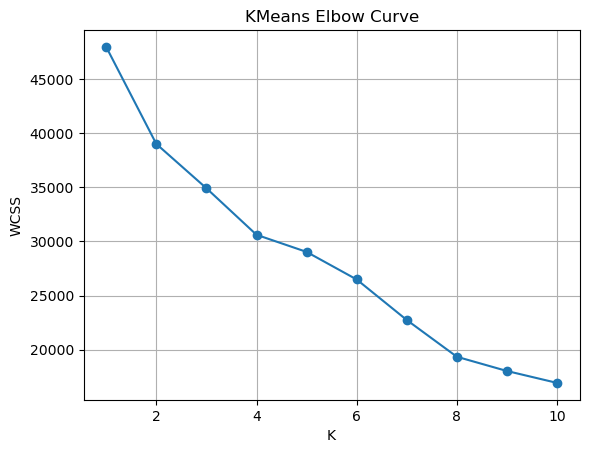

In [10]:
plt.plot(range(1, 11), wcss, marker='o')
plt.title("KMeans Elbow Curve")
plt.xlabel("K")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

K=4 would be ideal as k+1 to 3 reduces the WCSS steeply and after 4 the curve
flattens with increse in number of clusters

In [11]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)
data['Kmean_label']=kmeans_labels

#### Silhoutte scores

In [12]:
kmeans_silhouette = silhouette_score(data_scaled, kmeans_labels)
print(f"KMeans Silhouette Score: {kmeans_silhouette:.3f}")

KMeans Silhouette Score: 0.221


In [13]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=5)
tcomps = tsne.fit_transform(data_scaled)
tcomps

array([[  -9.2268305, -105.52     ],
       [  -9.036696 , -105.47906  ],
       [  -6.7473345,  -82.4387   ],
       ...,
       [  67.29696  ,   73.79674  ],
       [ -36.793526 ,   65.2954   ],
       [ -31.878502 ,   80.11     ]], dtype=float32)

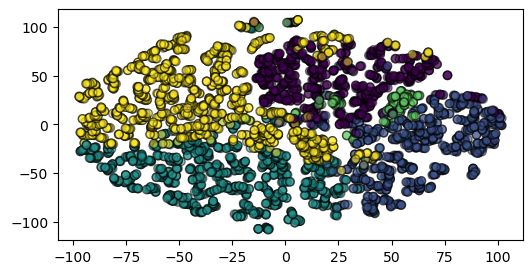

In [16]:
plt.figure(figsize=(6,3))

plt.scatter(tcomps[:,0], tcomps[:,1], 
            cmap='viridis', 
            c=data['Kmean_label'],
            alpha=0.5,
            edgecolors='black'
           )
plt.show()

### Hierarchial Clustering

In [17]:
for n in range(2,11):
    model = AgglomerativeClustering(n_clusters=n,linkage='complete', metric='euclidean')
    model.fit(data_scaled)
    print("_______________________________________________________________")
    print("number of cluster:",n)
    labels=model.labels_
    score=silhouette_score(data_scaled,labels)
    print("silhoutte Score:",score)

_______________________________________________________________
number of cluster: 2
silhoutte Score: 0.7147570737481664
_______________________________________________________________
number of cluster: 3
silhoutte Score: 0.7192161842959359
_______________________________________________________________
number of cluster: 4
silhoutte Score: 0.6276977845234434
_______________________________________________________________
number of cluster: 5
silhoutte Score: 0.6115840677576379
_______________________________________________________________
number of cluster: 6
silhoutte Score: 0.6087704536823315
_______________________________________________________________
number of cluster: 7
silhoutte Score: 0.6077094181823948
_______________________________________________________________
number of cluster: 8
silhoutte Score: 0.5463937617683708
_______________________________________________________________
number of cluster: 9
silhoutte Score: 0.517300974046736
_________________________________

Ideally 3 clusters give out a better silhoutte score

In [18]:
model = AgglomerativeClustering(n_clusters=3,linkage='complete', metric='euclidean')
model.fit(data_scaled)    

AgglomerativeClustering(linkage='complete', n_clusters=3)

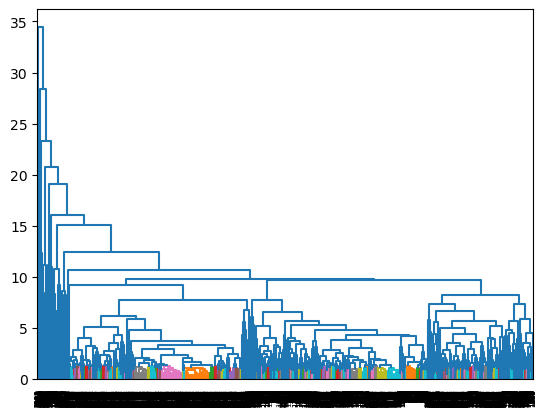

In [19]:
hr = hierarchy.linkage(data_scaled, method='complete')
dn = hierarchy.dendrogram(hr,color_threshold=1.25)

### DB Scan

In [20]:
for i in range(1,9):
    dbscan = DBSCAN(eps=i, min_samples=22)
    dbscan.fit(data_scaled)
    db_labels=dbscan.labels_
    score=silhouette_score(data_scaled,db_labels)
    print(score)

0.16477946551772812
0.21458806899252855
0.5102646368642396
0.5097322669887946
0.5062060925110072
0.5142027755166262
0.789452228800564
0.7921048512680431


In [35]:
dbscan = DBSCAN(eps=2, min_samples=5)
dbscan.fit(data_scaled)
db_labels=dbscan.labels_    
db_labels
score=silhouette_score(data_scaled,db_labels)
score

0.21112646945258373

In [36]:
data['Labels']=dbscan.labels_

In [37]:
db_label=data.groupby('Labels')

In [38]:
for x,y in db_label:
    print(y)
    print("___________________________________________________________________________________")

       ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
8        9   443003           0          3          2          1         1753   
21      22   185681        2024          1          1          1        13300   
50      51   108137           0          1          1          1         6368   
65      66    53914           0          3          1          1        33767   
70      72    84409        5031          2          1          1        15436   
...    ...      ...         ...        ...        ...        ...          ...   
3897  3920   179832        2954          3          1          1        18218   
3902  3925    13004        1000          1          1          1        13890   
3911  3934    55922        2273          1          1          1         8104   
3917  3940   130748           0          4          1          1        65510   
3934  3957    76595           0          1          1          1        10577   

      Bonus_trans  Flight_m

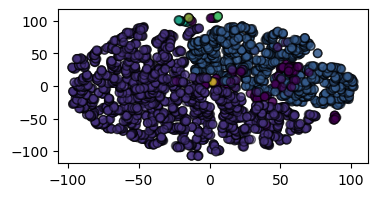

In [39]:
plt.figure(figsize=(4,2))

plt.scatter(tcomps[:,0], tcomps[:,1], 
            cmap='viridis', 
            c=data['Labels'],
            alpha=0.5,
            edgecolors='black'
           )
plt.show()

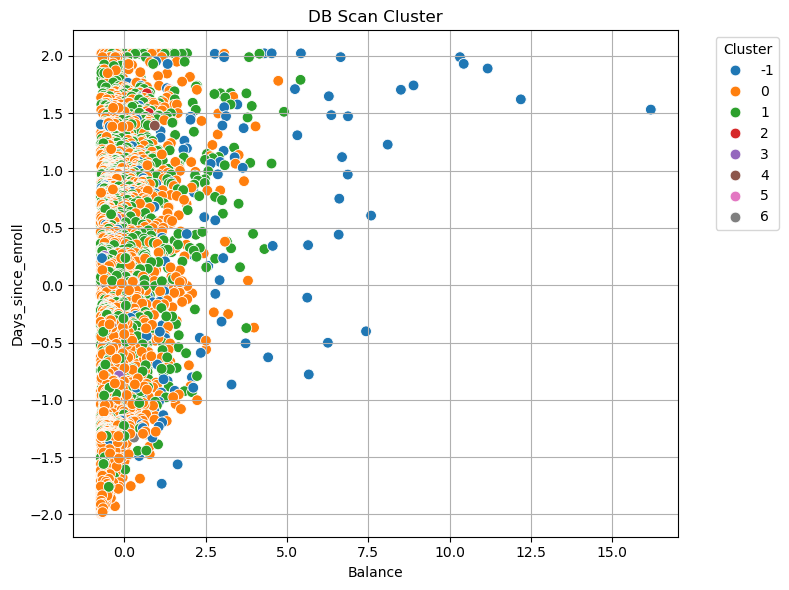

In [48]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=data_scaled[:, 1], 
    y=data_scaled[:, 10],
    hue=db_labels,
    palette='tab10',
    s=60
)
plt.title("DB Scan Cluster")
plt.xlabel(data.columns[1])
plt.ylabel(data.columns[10])
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


### Interpretation

**KMeans** effectively grouped flyers into distinct behavior-based segments. It identified one group with high balance and bonus miles (likely elite, long-term flyers), and another with low engagement across all features. KMeans is computationally efficient and performs well with spherical clusters, but it forces all data points into clusters—even noise or outliers—limiting flexibility.

**Hierarchical Clustering** produced similar groupings, with the added benefit of a dendrogram to understand inter-cluster relationships. It confirmed the structure seen in KMeans but is slower on large datasets. It's also sensitive to noise, and doesn’t scale well. However, it’s useful for exploratory analysis when the number of clusters is unknown.

**DBSCAN**, in contrast, grouped flyers based on density. It automatically detected core groups and marked outliers (noise) that didn’t belong to any cluster. It revealed nuanced segments—such as inactive flyers, highly active but non-redeeming flyers, and bonus-focused members. DBSCAN was best at identifying anomalies, but its effectiveness depended heavily on `eps` and `min_samples` values. Poor tuning could result in a single large cluster or no meaningful clusters.